In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

In [9]:
out=pt.import_excel('CHOMPI_test.xlsx', sheet_name='Sheet1')
Liq_unnorm=out['Liqs']
all_unnorm=out['my_input']
Liq_unnorm.head()

filt=all_unnorm['logfo2']<0

Liq_unnorm['Sample_ID_Liq']=all_unnorm['Experiment_long']

In [7]:
buff=pt.convert_fo2_to_buffer(fo2=10**(all_unnorm['logfo2']), T_K=all_unnorm['T_K'], P_kbar=all_unnorm['P_kbar'])
buff.loc[~filt, 'DeltaNNO_Frost1991']=0
buff

,DeltaNNO_Frost1991,DeltaQFM_Frost1991,QFM_equation_Choice,T_K,P_kbar,fo2,DeltaQFM_ONeill1987,Cut off T (K)
0,0.000000,10.065899,High T,1323.15,2.0,1.000000e+00,10.352094,896.150001
1,0.000000,10.065899,High T,1323.15,2.0,1.000000e+00,10.352094,896.150001
2,0.000000,10.281481,High T,1308.15,2.0,1.000000e+00,10.569180,896.150001
3,0.000000,10.427970,High T,1298.15,2.0,1.000000e+00,10.716691,896.150001
4,0.000000,10.804261,High T,1273.15,2.0,1.000000e+00,11.095608,896.150001
...,...,...,...,...,...,...,...,...
2073,0.001703,0.686681,High T,1173.15,1.5,1.479108e-12,0.942768,883.650000
2074,0.004255,0.651046,High T,1173.15,2.2,1.584893e-12,0.972768,901.150001
2075,0.004255,0.651046,High T,1173.15,2.2,1.584893e-12,0.972768,901.150001
2076,0.808777,0.921086,High T,1423.15,14.0,1.269939e-07,2.125582,1196.150000


In [11]:
len(Liq_unnorm)

2078

In [10]:
chomp_calc=pt.calculate_CHOMPI(liq_comps=Liq_unnorm,  deltaNNO=buff['DeltaNNO_Frost1991'],
                                T_K_guess=all_unnorm['T_K'], N_rep=100)
chomp_calc

,final_assessment,T_K_calc,P_kbar_calc,XCO2XH2O,XH2O_mol,SiO2_calc,TiO2_calc,Al2O3_calc,FeOt_calc,MgO_calc,...,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Fe3Fet_Liq,Sample_ID_Liq,NiO_Liq,CoO_Liq,CO2_Liq,H2O_Liq
0,Strong_negative,1346.448911,9.403536,2.012165,0.331987,50.353251,1.503562,22.214466,8.138335,4.452242,...,6.974647,13.227778,2.896082,0.120253,0.0,Sisson79-35g#6,0.0,0.0,0.0,6.000000
1,Strong_negative,1345.972729,9.509659,2.050812,0.327782,50.420278,1.499434,22.196655,8.186042,4.426258,...,6.601786,12.641718,2.779171,0.120397,0.0,Sisson79-35g#4,0.0,0.0,0.0,6.000000
2,Strong_negative,1337.734052,9.242116,2.172874,0.315172,51.187084,1.428945,21.901522,8.070903,4.269887,...,6.384685,12.127894,3.087100,0.110254,0.0,Sisson79-35g#11,0.0,0.0,0.0,6.000000
3,Strong_negative,1336.516365,9.273077,2.166443,0.315812,51.396023,1.418677,21.857558,8.043291,4.229399,...,6.384685,12.228125,2.996893,0.110254,0.0,Sisson79-35g#10,0.0,0.0,0.0,6.000000
4,Strong_negative,1326.218094,6.571874,1.693498,0.371264,52.010597,1.333391,21.423700,6.900570,4.311644,...,5.004513,9.668038,4.162070,0.210611,0.0,Sisson79-35g#12,0.0,0.0,0.0,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,Strong_negative,1169.205230,1.834755,-0.617663,2.615494,69.967220,0.410057,16.801680,2.420195,0.977530,...,0.740232,3.210909,4.307162,1.378143,0.0,NakataHG-602L,0.0,0.0,0.0,5.214023
2074,Strong_negative,1167.898641,1.903954,-0.654794,2.896822,70.107077,0.405561,16.830194,2.376703,0.962864,...,0.691164,3.102393,4.258906,1.312551,0.0,NakataHG-630N,0.0,0.0,0.0,6.601124
2075,Strong_negative,1163.817536,2.358187,-0.605383,2.534100,70.508091,0.392085,16.811837,2.299711,0.911177,...,0.716259,3.680718,4.307295,1.265881,0.0,NakataHG-630L,0.0,0.0,0.0,6.574380
2076,Strong_negative,1290.170900,4.524187,0.887919,0.529684,57.748473,1.037925,19.554091,5.060457,3.369056,...,3.961084,6.562097,4.159635,1.221086,0.0,Blatte2949,0.0,0.0,0.0,4.500000


In [16]:
chomp_calc_sp=chomp_calc.loc[chomp_calc['final_assessment']=='Strong_positive']
all_filt_sp=all_unnorm.loc[chomp_calc['final_assessment']=='Strong_positive']
chomp_calc_p=chomp_calc.loc[chomp_calc['final_assessment']=='Positive']
all_filt_p=all_unnorm.loc[chomp_calc['final_assessment']=='Positive']

In [26]:
all_filt_sp.loc[C_H_O_P]

,Unnamed: 0,Plag,Ol,Amp,Cpx,Opx,Citation,Experiment,Experiment_long,SiO2_Liq,...,P2O5_Liq,H2O_Liq,Total_Liq,DeltaNNO,logfo2,T_K,P_kbar,Experiment_P_Name,H2O_Liq_Method,N_meas_Liq
1284,1284,Yes,No,Yes,Yes,Yes,Blatter2023_notinLEPR,2995+gnt,Blatte2995+gnt,66.770000,...,0.28,5.70,92.39,0,-9.313631,1223.15,12.000,Blatte12.0,FTIR,19
1285,1285,Yes,No,Yes,Yes,Yes,Blatter2023_notinLEPR,2985,Blatte2985,70.140000,...,0.21,5.95,94.98,0,-10.053009,1173.15,12.000,Blatte12.0,FTIR,22
1317,1317,Yes,No,Yes,Yes,Yes,Blatter2023_notinLEPR,2825,Blatte2825,68.230000,...,0.19,6.60,95.39,0,-9.159299,1223.15,13.070,Blatte13.0,FTIR,25
1661,1661,Yes,No,Yes,Yes,Yes,"Moore, G., and Carmichael, I.S.E. (1998) The h...",PEM12-10,"Moore,PEM12-10",68.216216,...,0.00,4.50,97.00,0,0.000000,1223.15,1.455,"Moore,1.0",0,0


In [28]:
1248.15-273.15

975.0000000000001

In [31]:
chomp_calc_p['P_kbar_calc'].loc[C_H_O_Pp]

186     6.055176
1264    4.779905
1275    4.765395
1276    5.008084
1283    4.636995
1296    4.170092
Name: P_kbar_calc, dtype: float64

In [27]:
all_filt_p.loc[C_H_O_Pp]
# This is the experiment at 1 wt% H2O from Kawamoto - which is actually saturated in the CHOMPI assemblage

,Unnamed: 0,Plag,Ol,Amp,Cpx,Opx,Citation,Experiment,Experiment_long,SiO2_Liq,...,P2O5_Liq,H2O_Liq,Total_Liq,DeltaNNO,logfo2,T_K,P_kbar,Experiment_P_Name,H2O_Liq_Method,N_meas_Liq
186,186,Yes,No,Yes,Yes,Yes,"Kawamoto, T. (1996) Experimental constraints o...",22,Kawamo22,64.50,...,0.52,0.00,89.699997,0,0.000000,1248.15,5.0,Kawamo5.0,0,0
1264,1264,Yes,No,Yes,Yes,Yes,Blatter2023_notinLEPR,2778,Blatte2778,65.51,...,0.16,0.00,92.100000,0,-8.789206,1223.15,12.0,Blatte12.0,FTIR,11
1275,1275,Yes,No,Yes,Yes,Yes,Blatter2023_notinLEPR,2868,Blatte2868,59.12,...,0.34,6.36,93.930000,0,-7.971602,1323.15,14.6,Blatte15.0,FTIR,20
1276,1276,Yes,No,Yes,Yes,Yes,Blatter2023_notinLEPR,2899,Blatte2899,59.64,...,0.31,0.00,94.540000,0,-7.971602,1323.15,14.6,Blatte15.0,FTIR,16
1283,1283,Yes,No,Yes,Yes,Yes,Blatter2023_notinLEPR,2987,Blatte2987,66.66,...,0.27,5.57,95.610000,0,-9.313631,1223.15,12.0,Blatte12.0,FTIR,21
1296,1296,Yes,No,Yes,Yes,Yes,Blatter2023_notinLEPR,2961,Blatte2961,69.07,...,0.21,5.70,91.560000,0,-10.044842,1173.15,14.0,Blatte14.0,FTIR,20


In [22]:
(len(chomp_calc_p)+len(chomp_calc_sp))/len(chomp_calc)

0.20596727622714148

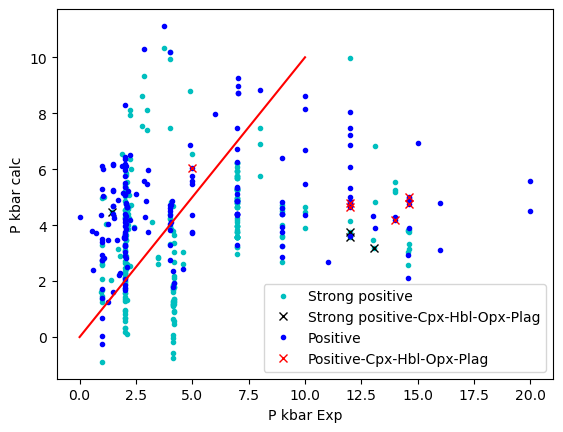

In [19]:
C_H_O_P=(all_filt_sp['Plag']=='Yes')&(all_filt_sp['Cpx']=='Yes')&(all_filt_sp['Opx']=='Yes')&(all_filt_sp['Amp']=='Yes')
C_H_O_Pp=(all_filt_p['Plag']=='Yes')&(all_filt_p['Cpx']=='Yes')&(all_filt_p['Opx']=='Yes')&(all_filt_p['Amp']=='Yes')

plt.plot(all_filt_sp['P_kbar'],
         chomp_calc_sp['P_kbar_calc'],  '.c', label='Strong positive')
plt.plot(all_filt_sp['P_kbar'].loc[C_H_O_P],
         chomp_calc_sp['P_kbar_calc'].loc[C_H_O_P],  'xk', label='Strong positive-Cpx-Hbl-Opx-Plag')

plt.plot(all_filt_p['P_kbar'],
         chomp_calc_p['P_kbar_calc'],  '.b', label='Positive')
plt.plot(all_filt_p['P_kbar'].loc[C_H_O_Pp],
         chomp_calc_p['P_kbar_calc'].loc[C_H_O_Pp],  'xr', label='Positive-Cpx-Hbl-Opx-Plag')
plt.plot([0, 10], [0, 10], '-r')
plt.xlabel('P kbar Exp')
plt.ylabel('P kbar calc')
plt.legend()


In [23]:
pt.calculate_R2(all_filt_sp['P_kbar'],
         chomp_calc_sp['P_kbar_calc'])

{'R2': '0.06',
 'RMSE': '3.72',
 'RMSE_num': 3.72354,
 'P_val': '0.000',
 'Median': '-1.17',
 'Mean': '-1.20',
 'Int': array([2.97944186]),
 'Grad': array([0.14532378]),
 'x_pred': array([[ 1.00000001],
        [ 1.00000001],
        [ 1.00000001],
        [ 4.05999988],
        [ 1.00000001],
        [ 1.00000001],
        [ 1.00000001],
        [ 1.00000001],
        [ 1.00000001],
        [ 1.        ],
        [ 7.        ],
        [ 7.        ],
        [ 9.        ],
        [ 4.        ],
        [ 7.        ],
        [ 7.        ],
        [ 9.        ],
        [ 7.        ],
        [ 9.        ],
        [ 4.        ],
        [ 4.        ],
        [ 7.        ],
        [ 7.        ],
        [ 7.        ],
        [ 9.        ],
        [ 9.        ],
        [ 9.        ],
        [ 7.        ],
        [ 7.        ],
        [ 9.        ],
        [ 9.        ],
        [ 3.994     ],
        [ 4.142     ],
        [ 4.04      ],
        [ 3.994     ],
        [ 3.994

In [21]:
sum(C_H_O_Pp)

6

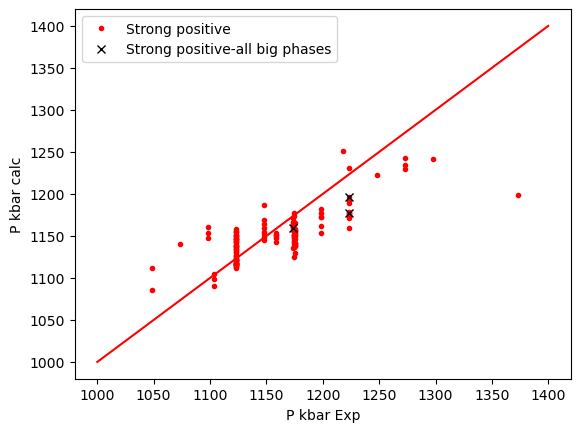

In [20]:
C_H_O_P=(all_filt_sp['Plag']=='Yes')&(all_filt_sp['Cpx']=='Yes')&(all_filt_sp['Opx']=='Yes')&(all_filt_sp['Amp']=='Yes')
plt.plot(all_filt_sp['T_K'],
         chomp_calc_sp['T_K_calc'],  '.r', label='Strong positive')
plt.plot(all_filt_sp['T_K'].loc[C_H_O_P],
         chomp_calc_sp['T_K_calc'].loc[C_H_O_P],  'xk', label='Strong positive-all big phases')
plt.plot([1000, 1400], [1000, 1400], '-r')
plt.xlabel('P kbar Exp')
plt.ylabel('P kbar calc')
plt.legend()


In [23]:
chomp_calc

,final_assessment,T_K_calc,P_kbar_calc,XCO2XH2O,XH2O_mol,SiO2_calc,TiO2_calc,Al2O3_calc,FeOt_calc,MgO_calc,...,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Fe3Fet_Liq,Sample_ID_Liq,NiO_Liq,CoO_Liq,CO2_Liq,H2O_Liq
0,Strong_negative,1439.292050,9.197095,3.393251,0.227622,32.114942,2.386319,26.009079,11.280503,7.894173,...,8.621208,10.013017,1.892460,0.340443,0.0,375,0.0,0.0,0.0,0.700000
1,Strong_negative,1326.447235,8.145914,2.970318,0.251869,50.680244,1.308858,21.314321,8.336788,4.309248,...,6.040874,9.707473,2.013625,0.380685,0.0,376,0.0,0.0,0.0,0.700000
2,Strong_negative,1397.802044,9.730571,3.218691,0.237040,40.209081,1.950961,24.133891,10.446199,6.243308,...,7.674582,10.219417,1.833484,0.330628,0.0,379,0.0,0.0,0.0,1.600000
3,Strong_negative,1383.341670,9.057307,3.274358,0.233953,42.046867,1.804812,23.522268,10.002032,5.926293,...,7.609131,9.981978,1.882259,0.330396,0.0,380,0.0,0.0,0.0,1.700000
4,Strong_negative,1367.858916,9.052721,3.018608,0.248842,45.042724,1.666329,22.886226,9.430481,5.367669,...,6.945976,9.972938,2.004611,0.340784,0.0,381,0.0,0.0,0.0,1.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,Strong_negative,1169.205230,1.834755,-0.617663,2.615494,69.967220,0.410057,16.801680,2.420195,0.977530,...,0.740232,3.210909,4.307162,1.378143,0.0,2073,0.0,0.0,0.0,5.214023
707,Strong_negative,1167.898641,1.903954,-0.654794,2.896822,70.107077,0.405561,16.830194,2.376703,0.962864,...,0.691164,3.102393,4.258906,1.312551,0.0,2074,0.0,0.0,0.0,6.601124
708,Strong_negative,1163.817536,2.358187,-0.605383,2.534100,70.508091,0.392085,16.811837,2.299711,0.911177,...,0.716259,3.680718,4.307295,1.265881,0.0,2075,0.0,0.0,0.0,6.574380
709,Strong_negative,1290.170900,4.524187,0.887919,0.529684,57.748473,1.037925,19.554091,5.060457,3.369056,...,3.961084,6.562097,4.159635,1.221086,0.0,2076,0.0,0.0,0.0,4.500000


In [5]:
# CHOMPI functoin

# Required inputs
def calculate_CHOMPI_P_T_XH2O(liq_norm):

        """ 
        This function actually calculates T_K, P_kbar and XCO2H2O based on the liquid composition. 

        """


        T_K=(0+11.0697*liq_norm['SiO2_Liq']+127.175*liq_norm['TiO2_Liq']
        +17.968*liq_norm['Al2O3_Liq']+0*liq_norm['FeOt_Liq']+54.428*liq_norm['MgO_Liq']
        +0*liq_norm['CaO_Liq']+0*liq_norm['Na2O_Liq'])


        P_kbar=(0+0*liq_norm['SiO2_Liq']+0*liq_norm['TiO2_Liq']+0.7995*liq_norm['Al2O3_Liq']
                +0*liq_norm['FeOt_Liq']+0*liq_norm['MgO_Liq']+0*liq_norm['CaO_Liq']-2.1199*liq_norm['Na2O_Liq'])

        XCO2_mol=(21.0129+-0.23383*liq_norm['SiO2_Liq']+0*liq_norm['TiO2_Liq']
                +0*liq_norm['Al2O3_Liq']+0*liq_norm['FeOt_Liq']+0*liq_norm['MgO_Liq']
                -0.4354*liq_norm['CaO_Liq']-0.6723*liq_norm['Na2O_Liq'])
        XH2O=(1/(1+XCO2_mol))

        return liq_norm, T_K, P_kbar, XCO2_mol, XH2O




In [6]:
def calculate_CHOMPI_residuals(liq_norm, P_kbar, T_K, XCO2_mol, XH2O, deltaNNO, T_K_guess, df_out=True):

    """ 
    This function calculates the residuals for the CHOMPI function
    
    """

    T_K_residual=T_K-T_K_guess
    SiO2_Calc=(-4741.99+0.688*P_kbar-0.74491*T_K-1.978*XCO2_mol+0*deltaNNO
            +0*P_kbar/T_K+0.847*liq_norm['K2O_Liq']+803.963*np.log(T_K))

    TiO2_Calc=(279.62+0*P_kbar+0.04336*T_K+0*XCO2_mol-0.024*deltaNNO
            +0*P_kbar/T_K+0*liq_norm['K2O_Liq']-46.702*np.log(T_K))

    Al2O3_Calc=(1311.64+0*P_kbar+0.19754*T_K+0*XCO2_mol+0*deltaNNO
                +0*P_kbar/T_K-0.69*liq_norm['K2O_Liq']-215.86*np.log(T_K))

    FeOt_Calc=(0+2.925*P_kbar+0.00323*T_K+0.961*XCO2_mol+0*deltaNNO
            -3668*P_kbar/T_K-0.271*liq_norm['K2O_Liq']+0*np.log(T_K))

    MgO_Calc=(1109.3-1.078*P_kbar+0.17246*T_K+0.194*XCO2_mol+0.044*deltaNNO
            +1199*P_kbar/T_K-0.182*liq_norm['K2O_Liq']-185.374*np.log(T_K))

    CaO_Calc=(-10.06+0*P_kbar+0.01282*T_K+0.416*XCO2_mol+0*deltaNNO
            +0*P_kbar/T_K-0.666*liq_norm['K2O_Liq']+0*np.log(T_K))

    Na2O_Calc=(1222.98+2.212*P_kbar+0.16236*T_K+0*XCO2_mol+0*deltaNNO
            -2929*P_kbar/T_K-0*liq_norm['K2O_Liq']+-199.31*np.log(T_K))


    Compositional_residual=(
        (SiO2_Calc-liq_norm['SiO2_Liq'])**2
        +(TiO2_Calc-liq_norm['TiO2_Liq'])**2
        +(Al2O3_Calc-liq_norm['Al2O3_Liq'])**2
        +(FeOt_Calc-liq_norm['FeOt_Liq'])**2
        +(MgO_Calc-liq_norm['MgO_Liq'])**2
        +(CaO_Calc-liq_norm['CaO_Liq'])**2
        +(Na2O_Calc-liq_norm['Na2O_Liq'])**2
    )

    Fail_Cali_test_SiO2= (liq_norm['SiO2_Liq']<53) | (liq_norm['SiO2_Liq']>78)
    Fail_Cali_test_Al2O3= (liq_norm['Al2O3_Liq']<12) | (liq_norm['Al2O3_Liq']>21)
    Fail_Cali_test_MgO= (liq_norm['MgO_Liq']>4) 
    Fail_Cali_test_Na2O= (liq_norm['Na2O_Liq']>7) 
    Fail_Cali_test_K2O= (liq_norm['K2O_Liq']>6) 
    Fail_overall=((Fail_Cali_test_SiO2) | (Fail_Cali_test_Al2O3) | (Fail_Cali_test_MgO) |(Fail_Cali_test_Na2O) |(Fail_Cali_test_K2O)) 

    if df_out==True:
        df_out=pd.DataFrame(data={
                              'T_K_calc': T_K,
                            'P_kbar_calc': P_kbar,
                            'XCO2XH2O': XCO2_mol,
                            'XH2O_mol': XH2O,
                            'SiO2_calc': SiO2_Calc,
                            'TiO2_calc': TiO2_Calc,
                            'Al2O3_calc': Al2O3_Calc,
                            'FeOt_calc': FeOt_Calc,
                            'MgO_calc': MgO_Calc,
                            'CaO_calc': CaO_Calc,
                            'Na2O_calc': Na2O_Calc,
                            'K2O_calc': 100-(SiO2_Calc+TiO2_Calc+Al2O3_Calc+FeOt_Calc+MgO_Calc+CaO_Calc+Na2O_Calc),
                            'comp_residual': Compositional_residual,
                            'T_K_residual': T_K_residual,
                            'CHOMPI (SSI<6?)': 'True',
                            'In Cali Range?': ~Fail_overall,
                            'Pass_Cali_test_SiO2?': ~Fail_Cali_test_SiO2,
                            'Pass_Cali_test_Al2O3?': ~Fail_Cali_test_Al2O3,
                            'Pass_Cali_test_MgO?': ~Fail_Cali_test_MgO,
                            'Pass_Cali_test_Na2O?': ~Fail_Cali_test_Na2O,  
                            'Pass_Cali_test_K2O?': ~Fail_Cali_test_K2O, 
                                                       
                            })
        
        concat=pd.concat([df_out, liq_norm], axis=1)

        
        return concat
    else:
        return Compositional_residual





    

    


In [7]:
df_out, liq_norm_to_dup=calculate_CHOMPI_before_dup(liq_comps=Liq_unnorm,  deltaNNO=all['∆NNO (log units)'], T_K_guess=all['T erupt (°C)'])
liq_norm_to_dup.head()
## ADd in calibration limits - give Nan if outside of these

NameError: name 'calculate_CHOMPI_before_dup' is not defined

In [ ]:
# Parameters
N_rep = 100  # Number of repetitions
T_perturb = np.linspace(-16.2, 16.2, N_rep)  # Perturbation values for 'T_K'
P_perturb = np.linspace(-1.2, 1.2, N_rep)  # Perturbation values for 'P_kbar'
XCO2_perturb = np.linspace(-0.426, 0.427, N_rep)  # Perturbation values for 'XCO2'



# # Create a new DataFrame with duplicated rows
#     duplicated_df = pd.DataFrame(duplicated_rows, columns=liq_norm_to_dup.columns)

# # Reset the index
#     duplicated_df.reset_index(drop=True, inplace=True)
#     return duplicated_df


duplicated_df_T_perturb = duplicate_rows(liq_norm_to_dup, N_rep)
duplicated_df_P_perturb = duplicate_rows(liq_norm_to_dup, N_rep)
duplicated_df_XCO2_perturb = duplicate_rows(liq_norm_to_dup, N_rep)
N_sample=len(liq_norm_to_dup)
duplicated_T_values = np.tile(T_perturb, N_sample)
duplicated_P_values = np.tile(P_perturb, N_sample)
duplicated_XCO2_values = np.tile(XCO2_perturb, N_sample)

# Now add on these columns to each
duplicated_df_T_perturb['T_K']=duplicated_df_T_perturb['T_K']+duplicated_T_values
duplicated_df_P_perturb['P_kbar']=duplicated_df_P_perturb['P_kbar']+duplicated_P_values
duplicated_df_P_perturb['XCO2XH2O']=duplicated_df_P_perturb['XCO2XH2O']+duplicated_XCO2_values

appended_df = pd.concat([duplicated_df_T_perturb, duplicated_df_P_perturb, duplicated_df_P_perturb], ignore_index=True)

# Now do the calculations again for this dataframe. 
XH2O=(1/(1+appended_df['XCO2XH2O']))


comp_residual=calculate_CHOMPI_residuals(appended_df, P_kbar=appended_df['P_kbar'], T_K=appended_df['T_K'], XCO2_mol=appended_df['XCO2XH2O'],
                                       XH2O=XH2O, deltaNNO=appended_df['deltaNNO'], T_K_guess=appended_df['T_K_guess'], df_out=False)


Strong_Positive = np.array([''] * N_sample, dtype='U1')
Positive=np.array([''] * N_sample, dtype='U1')
Permissive_positive=np.array([''] * N_sample, dtype='U1')
Strong_negative=np.array([''] * N_sample, dtype='U1')
i=0
for sam in appended_df['Sample_ID_Liq'].unique():
    sam_ind=appended_df['Sample_ID_Liq']==sam
    comp_residual_sam=comp_residual.loc[sam_ind]

    # Strong positive - Initial value less than 6, no pertubation takes >6
    Strong_Positive[i]= ( ~(comp_residual_sam > 6).any()) & (df_out['comp_residual'].iloc[i]<6)
    # Positive, initial value <6, but some pertubations take away from 6
    Positive[i]=((comp_residual_sam > 6).any()) & (df_out['comp_residual'].iloc[i]<6)
    # permissive positive, initial value more than 6, but some pertubatoin takes less
    Permissive_positive[i]=(df_out['comp_residual'].iloc[i]>6) & ((comp_residual_sam < 6).any())
    # strong negative - initial value more than 6, no pertubation takes away
    Strong_negative[i]=(df_out['comp_residual'].iloc[i]>6) & (~(comp_residual_sam < 6).any())
    i=i+1

df_assessment=pd.DataFrame(data={'Strong_positive': Strong_Positive,
                          'Positive': Positive,
                          'Permissive_positive': Permissive_positive,
                          'Strong_negative': Strong_negative}
                          )
    
first_true_column = df_assessment.eq('T').values.argmax(axis=1)

# Get the corresponding column names for the first 'T' occurrence
column_names = np.array(df_assessment.columns)
final_assessment = np.where(first_true_column >= 0, column_names[first_true_column], 'No True Found')

# Assign the final assessment to the 'final_assessment' column
df_assessment['final_assessment'] = final_assessment

df_out.insert(0, 'final_assessment', final_assessment)


In [ ]:
df_out


,final_assessment,T_K_calc,P_kbar_calc,XCO2XH2O,XH2O_mol,SiO2_calc,TiO2_calc,Al2O3_calc,FeOt_calc,MgO_calc,...,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Fe3Fet_Liq,Sample_ID_Liq,NiO_Liq,CoO_Liq,CO2_Liq,H2O_Liq
0,Strong_positive,1173.709528,3.504459,0.378169,0.725600,69.893687,0.401833,16.037467,2.756033,0.959862,...,1.408777,3.599436,4.258715,2.572347,0.0,0,0.0,0.0,0.0,0.0
1,Permissive_positive,1276.842769,4.881374,0.853850,0.539418,59.635015,0.940393,19.167929,4.871097,2.992865,...,3.670163,6.234633,4.140009,1.213647,0.0,1,0.0,0.0,0.0,0.0
2,Strong_positive,1121.009366,2.267972,0.364307,0.732973,72.840975,0.262233,14.364388,2.023597,0.252214,...,0.362842,1.399290,4.134659,4.281403,0.0,2,0.0,0.0,0.0,0.0
3,Permissive_positive,1289.833057,5.757290,1.455582,0.407235,57.456685,1.030918,19.591490,5.720371,3.308518,...,3.697594,6.364292,4.139059,1.152095,0.0,3,0.0,0.0,0.0,0.0
4,Strong_positive,1110.734404,1.259607,0.227763,0.814489,72.458598,0.246746,14.493137,2.238104,0.226659,...,0.196227,0.948193,4.900449,4.033852,0.0,4,0.0,0.0,0.0,0.0
5,Strong_positive,1139.823280,2.063691,0.101940,0.907490,71.645771,0.300709,15.253847,2.315306,0.527896,...,0.554886,1.948803,4.458356,3.171730,0.0,5,0.0,0.0,0.0,0.0
6,Strong_negative,1308.671214,3.876874,1.647400,0.377729,53.435331,1.170585,20.160541,5.962740,4.128048,...,3.237486,6.523270,4.609203,1.184528,0.0,6,0.0,0.0,0.0,0.0
7,Strong_positive,1247.152023,4.586958,0.887036,0.529932,62.506582,0.751801,18.431747,4.497707,2.396992,...,2.729397,5.827030,4.585474,1.140891,0.0,7,0.0,0.0,0.0,0.0
8,Positive,1240.851924,3.919139,0.759804,0.568245,63.186134,0.715146,18.063794,4.222235,2.264464,...,2.391190,5.170495,4.533059,1.454849,0.0,8,0.0,0.0,0.0,0.0
9,Permissive_positive,1263.875916,4.418278,1.417773,0.413604,60.594138,0.854852,18.043767,4.915844,2.663038,...,2.735614,5.340246,4.074617,2.323852,0.0,9,0.0,0.0,0.0,0.0


In [ ]:
df_assessment['final_assessment'].to_clipboard(excel=True, index=False)

## Benchmarking

In [ ]:
df_out.columns

Index(['final_assessment', 'T_K_calc', 'P_kbar_calc', 'XCO2XH2O', 'XH2O_mol',
       'SiO2_calc', 'TiO2_calc', 'Al2O3_calc', 'FeOt_calc', 'MgO_calc',
       'CaO_calc', 'Na2O_calc', 'K2O_calc', 'comp_residual', 'T_K_residual',
       'CHOMPI (SSI<6?)', 'In Cali Range?', 'Pass_Cali_test_SiO2?',
       'Pass_Cali_test_Al2O3?', 'Pass_Cali_test_MgO?', 'Pass_Cali_test_Na2O?',
       'Pass_Cali_test_K2O?', 'SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq',
       'MgO_Liq', 'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'Fe3Fet_Liq',
       'Sample_ID_Liq', 'NiO_Liq', 'CoO_Liq', 'CO2_Liq', 'H2O_Liq'],
      dtype='object')

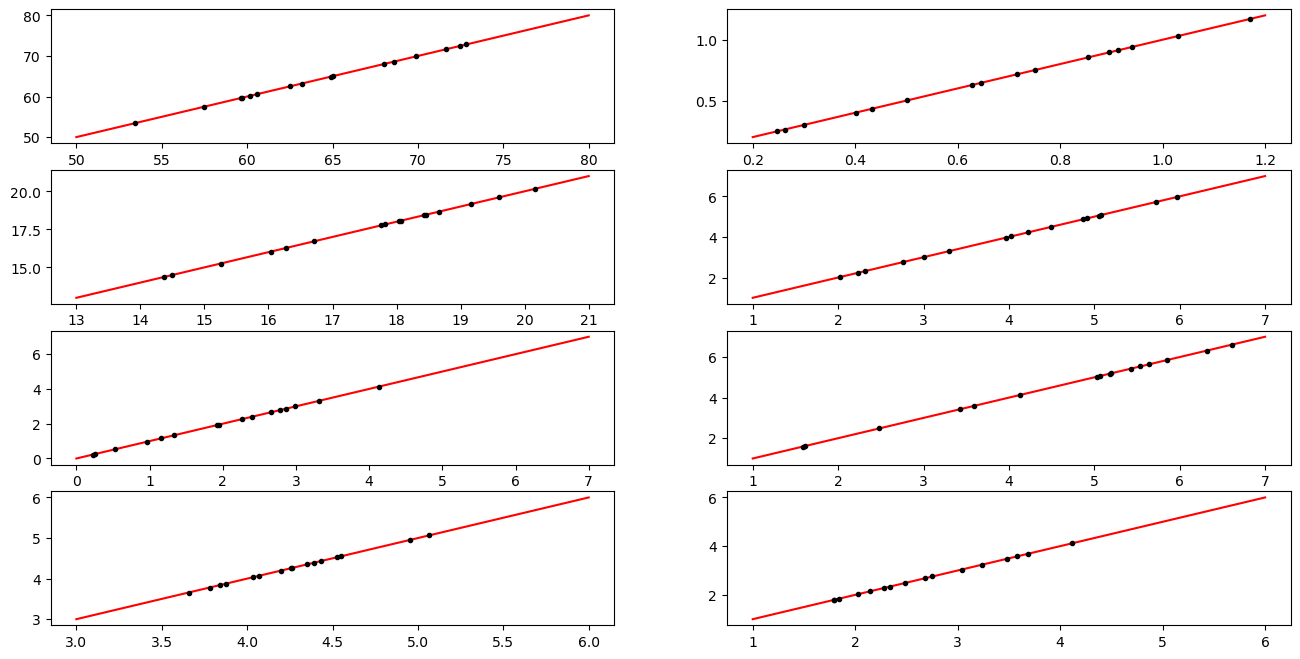

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16,8))
ax1.plot([50, 80], [50, 80], '-r')
ax1.plot(all['SiO2_calc'], df_out['SiO2_calc'], '.k')

ax2.plot([0.2, 1.2], [0.2, 1.2], '-r')
ax2.plot(all['TiO2_calc'], df_out['TiO2_calc'], '.k')

ax3.plot([13, 21], [13, 21], '-r')
ax3.plot(all['Al2O3_calc'], df_out['Al2O3_calc'], '.k')

ax4.plot([1, 7], [1, 7], '-r')
ax4.plot(all['FeOt_calc'], df_out['FeOt_calc'], '.k')

ax5.plot([0, 7], [0, 7], '-r')
ax5.plot(all['MgO_calc'], df_out['MgO_calc'], '.k')

ax6.plot([1, 7], [1, 7], '-r')
ax6.plot(all['CaO_calc'], df_out['CaO_calc'], '.k')

ax7.plot([3, 6], [3, 6], '-r')
ax7.plot(all['Na2O_calc'], df_out['Na2O_calc'], '.k')

ax8.plot([1, 6], [1, 6], '-r')
ax8.plot(all['K2O_calc'], df_out['K2O_calc'], '.k')

KeyError: 'XCO2_mol'

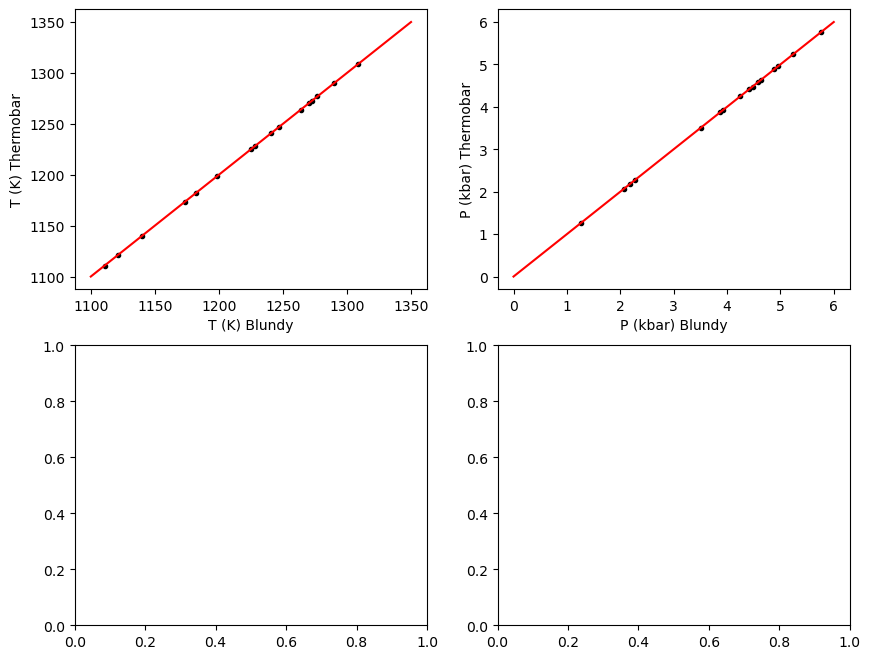

In [ ]:
all
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
ax1.plot(all['T (K)'], df_out['T_K_calc'], '.k')
ax1.plot([1100, 1350], [1100, 1350], '-r')
ax1.set_xlabel('T (K) Blundy')
ax1.set_ylabel('T (K) Thermobar')

ax2.plot(all['P (kbar)'], df_out['P_kbar_calc'], '.k')
ax2.plot([0, 6], [0, 6], '-r')
ax2.set_xlabel('P (kbar) Blundy')
ax2.set_ylabel('P (kbar) Thermobar')


ax3.plot(all['CO2/H2O (mol)'], df_out['XCO2_mol'], '.k')
ax3.plot([0, 1.7], [0, 1.7], '-r')
ax3.set_xlabel('XCO2 Blundy')
ax3.set_ylabel('XCO2 Thermobar')

ax4.plot(all['XH2O'], df_out['XH2O_mol'], '.k')
ax4.plot([0, 1], [0, 1], '-r')
ax4.set_xlabel('XH2O Blundy')
ax4.set_ylabel('XH2O Thermobar')

In [ ]:
df_assessment['Strong_positive']=='T'

0      True
1     False
2      True
3     False
4      True
5      True
6     False
7      True
8     False
9     False
10    False
11    False
12     True
13    False
14     True
15    False
Name: Strong_positive, dtype: bool

In [ ]:
df_assesment

,Strong_positive,positive_array,permissive_positive_array,strong_negative,final_assessment
0,T,F,F,F,Strong_positive
1,F,F,T,F,Strong_positive
2,T,F,F,F,Strong_positive
3,F,F,T,F,Strong_positive
4,T,F,F,F,Strong_positive
5,T,F,F,F,Strong_positive
6,F,F,F,T,Strong_positive
7,T,F,F,F,Strong_positive
8,T,T,F,F,Strong_positive
9,F,F,T,F,Strong_positive


In [ ]:
df_numerical = df_out.select_dtypes(include=['float64'])
df_numerical

,T_K_calc,P_kbar_calc,XCO2_mol,XH2O_mol,SiO2_calc,TiO2_calc,Al2O3_calc,FeOt_calc,MgO_calc,CaO_calc,...,FeOt_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,H2O_Liq
0,1173.709528,3.504459,0.378169,0.725600,69.893687,0.401833,16.037467,2.756033,0.959862,3.431091,...,2.805987,1.408777,3.599436,4.258715,2.572347,0.0,0.0,0.0,0.0,0.0
1,1276.842769,4.881374,0.853850,0.539418,59.635015,0.940393,19.167929,4.871097,2.992865,5.856037,...,4.360429,3.670163,6.234633,4.140009,1.213647,0.0,0.0,0.0,0.0,0.0
2,1121.009366,2.267972,0.364307,0.732973,72.840975,0.262233,14.364388,2.023597,0.252214,1.611477,...,1.924439,0.362842,1.399290,4.134659,4.281403,0.0,0.0,0.0,0.0,0.0
3,1289.833057,5.757290,1.455582,0.407235,57.456685,1.030918,19.591490,5.720371,3.308518,6.313887,...,5.804112,3.697594,6.364292,4.139059,1.152095,0.0,0.0,0.0,0.0,0.0
4,1110.734404,1.259607,0.227763,0.814489,72.458598,0.246746,14.493137,2.238104,0.226659,1.587819,...,2.082972,0.196227,0.948193,4.900449,4.033852,0.0,0.0,0.0,0.0,0.0
5,1139.823280,2.063691,0.101940,0.907490,71.645771,0.300709,15.253847,2.315306,0.527896,2.482570,...,2.144941,0.554886,1.948803,4.458356,3.171730,0.0,0.0,0.0,0.0,0.0
6,1308.671214,3.876874,1.647400,0.377729,53.435331,1.170585,20.160541,5.962740,4.128048,6.613588,...,8.460100,3.237486,6.523270,4.609203,1.184528,0.0,0.0,0.0,0.0,0.0
7,1247.152023,4.586958,0.887036,0.529932,62.506582,0.751801,18.431747,4.497707,2.396992,5.537663,...,5.074832,2.729397,5.827030,4.585474,1.140891,0.0,0.0,0.0,0.0,0.0
8,1240.851924,3.919139,0.759804,0.568245,63.186134,0.715146,18.063794,4.222235,2.264464,5.194871,...,4.799023,2.391190,5.170495,4.533059,1.454849,0.0,0.0,0.0,0.0,0.0
9,1263.875916,4.418278,1.417773,0.413604,60.594138,0.854852,18.043767,4.915844,2.663038,5.184997,...,6.002525,2.735614,5.340246,4.074617,2.323852,0.0,0.0,0.0,0.0,0.0


In [ ]:
norm=
norm.head()

SyntaxError: invalid syntax (1423964935.py, line 1)

In [ ]:
Liq

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,69.299930,0.379375,15.675434,2.805987,0.0,1.408777,3.599436,4.258715,2.572347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,62.700096,0.598123,17.082901,4.360429,0.0,3.670163,6.234633,4.140009,1.213647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,73.809867,0.284792,13.799402,1.924367,0.0,0.362829,1.399238,4.134504,4.281242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,59.888379,0.778871,18.176070,5.804146,0.0,3.697616,6.364331,4.139084,1.152102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,73.034776,0.234337,14.569193,2.082972,0.0,0.196227,0.948193,4.900449,4.033852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
5,72.980789,0.337792,14.402702,2.144941,0.0,0.554886,1.948803,4.458356,3.171730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
6,57.419924,1.494916,17.070572,8.460100,0.0,3.237486,6.523270,4.609203,1.184528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
7,62.036353,0.710207,17.895815,5.074832,0.0,2.729397,5.827030,4.585474,1.140891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
8,63.953669,0.776175,16.921540,4.799023,0.0,2.391190,5.170495,4.533059,1.454849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
9,62.141807,1.051058,16.330281,6.002525,0.0,2.735614,5.340246,4.074617,2.323852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
